In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df=pd.read_csv('BreastCancerWc.csv')
df.columns = ['id','ClumpThickness','UniformityOfCellSize','UniformityOfCellShape','MarginalAdhesion','SingleEpithelialCellSize','BareNuclei','BlandChromatin','NormaNucleoli','Mitoses','Class']

In [3]:
df.head()

id  ClumpThickness  UniformityOfCellSize  UniformityOfCellShape  \
0  1002945               5                     4                      4   
1  1015425               3                     1                      1   
2  1016277               6                     8                      8   
3  1017023               4                     1                      1   
4  1017122               8                    10                     10   

   MarginalAdhesion  SingleEpithelialCellSize BareNuclei  BlandChromatin  \
0                 5                         7         10               3   
1                 1                         2          2               3   
2                 1                         3          4               3   
3                 3                         2          1               3   
4                 8                         7         10               9   

   NormaNucleoli  Mitoses  Class  
0              2        1      2  
1              1        1      2  
2              7        1      2  
3              1        1      2  
4              7        1      4

In [4]:
df.shape

(698, 11)

In [5]:
df.isnull().sum()

id                          0
ClumpThickness              0
UniformityOfCellSize        0
UniformityOfCellShape       0
MarginalAdhesion            0
SingleEpithelialCellSize    0
BareNuclei                  0
BlandChromatin              0
NormaNucleoli               0
Mitoses                     0
Class                       0
dtype: int64

In [6]:
df = df.replace('?',np.NaN)

In [7]:
df.isnull().sum()

id                           0
ClumpThickness               0
UniformityOfCellSize         0
UniformityOfCellShape        0
MarginalAdhesion             0
SingleEpithelialCellSize     0
BareNuclei                  16
BlandChromatin               0
NormaNucleoli                0
Mitoses                      0
Class                        0
dtype: int64

<AxesSubplot:>

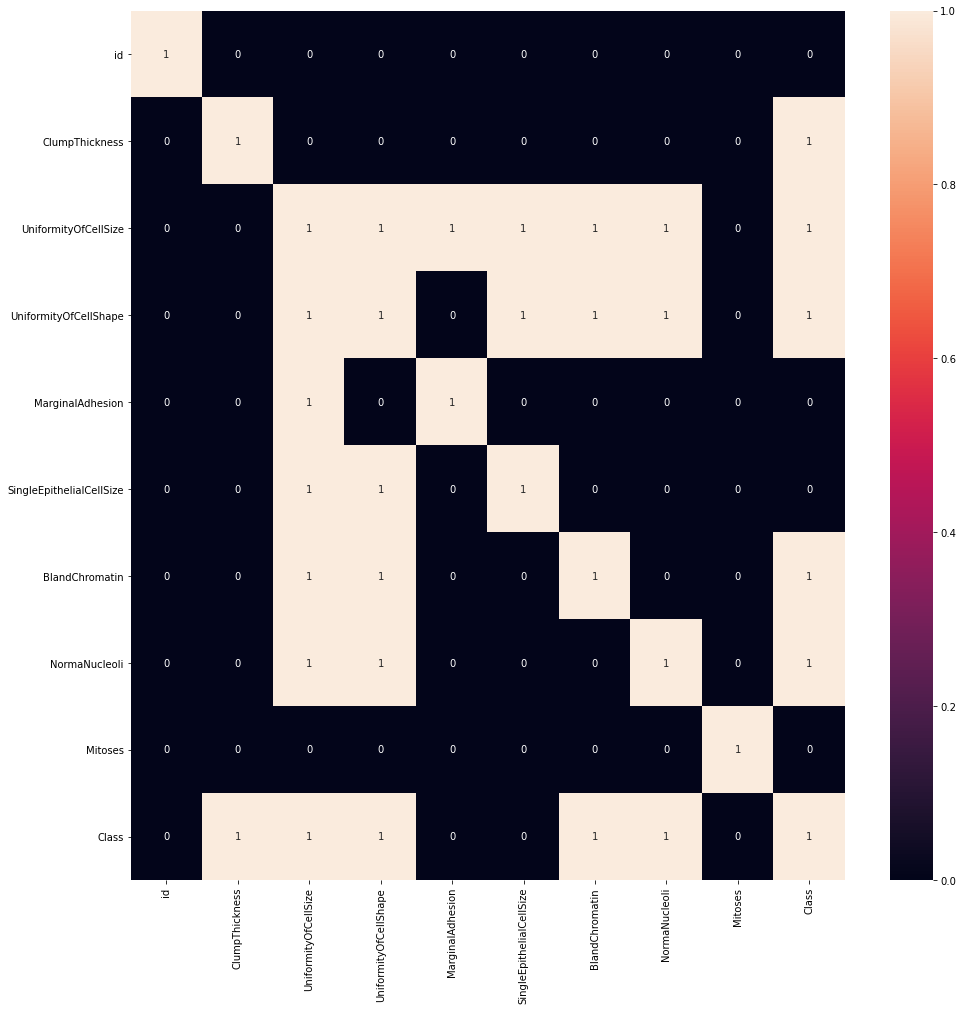

In [8]:
plt.figure(figsize=(16,16))
sns.heatmap(abs(df.corr())>0.70, annot=True)

<AxesSubplot:>

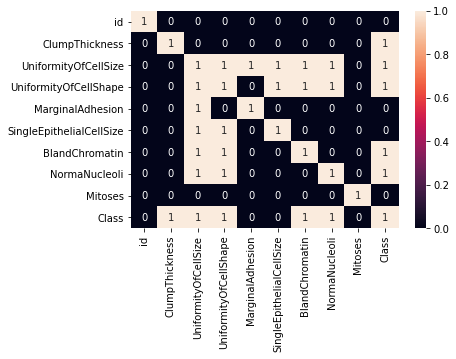

In [9]:
sns.heatmap(abs(df.corr()>0.7),annot=True)

In [10]:
df.dropna(how='any',inplace=True)

In [11]:
df.isnull().sum()

id                          0
ClumpThickness              0
UniformityOfCellSize        0
UniformityOfCellShape       0
MarginalAdhesion            0
SingleEpithelialCellSize    0
BareNuclei                  0
BlandChromatin              0
NormaNucleoli               0
Mitoses                     0
Class                       0
dtype: int64

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
x=df.drop(columns=['Class'])
y=df['Class']

In [14]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2,
    train_size=0.8)

In [15]:
X_train.columns

Index(['id', 'ClumpThickness', 'UniformityOfCellSize', 'UniformityOfCellShape',
       'MarginalAdhesion', 'SingleEpithelialCellSize', 'BareNuclei',
       'BlandChromatin', 'NormaNucleoli', 'Mitoses'],
      dtype='object')

In [16]:
X_test.columns

Index(['id', 'ClumpThickness', 'UniformityOfCellSize', 'UniformityOfCellShape',
       'MarginalAdhesion', 'SingleEpithelialCellSize', 'BareNuclei',
       'BlandChromatin', 'NormaNucleoli', 'Mitoses'],
      dtype='object')

In [17]:
X_train.isnull().sum()

id                          0
ClumpThickness              0
UniformityOfCellSize        0
UniformityOfCellShape       0
MarginalAdhesion            0
SingleEpithelialCellSize    0
BareNuclei                  0
BlandChromatin              0
NormaNucleoli               0
Mitoses                     0
dtype: int64

In [18]:
X_test.isnull().sum()

id                          0
ClumpThickness              0
UniformityOfCellSize        0
UniformityOfCellShape       0
MarginalAdhesion            0
SingleEpithelialCellSize    0
BareNuclei                  0
BlandChromatin              0
NormaNucleoli               0
Mitoses                     0
dtype: int64

In [19]:
from sklearn.naive_bayes import GaussianNB
clf=GaussianNB()
clf.fit(X_train,Y_train)

GaussianNB()

In [21]:
clf.score(X_test,Y_test)   #baseline Score

0.7737226277372263

In [23]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,Y_train)

LogisticRegression()

In [24]:
lr.score(X_test,Y_test)

0.6788321167883211

In [27]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
pd.DataFrame(X_train_scaled)

0         1         2         3         4         5         6  \
0    0.074901  0.222222  0.111111  0.000000  0.000000  0.000000  0.000000   
1    0.036977  0.333333  0.000000  0.222222  0.222222  0.111111  0.000000   
2    0.078451  0.888889  0.444444  0.444444  0.111111  0.111111  0.111111   
3    0.083566  0.333333  0.111111  0.000000  0.000000  0.111111  0.000000   
4    0.053935  0.777778  0.555556  0.666667  0.222222  0.222222  1.000000   
..        ...       ...       ...       ...       ...       ...       ...   
540  0.093368  0.222222  0.000000  0.000000  0.000000  0.111111  0.000000   
541  0.092093  0.444444  0.111111  0.000000  0.000000  0.111111  0.000000   
542  0.059962  0.777778  1.000000  0.444444  0.222222  0.777778  0.333333   
543  0.082902  0.000000  0.000000  0.000000  0.000000  0.333333  0.222222   
544  0.083566  0.222222  0.000000  0.000000  0.000000  0.111111  0.000000   

            7         8         9  
0    0.111111  0.000000  0.000000  
1    0.000000  0.000000  0.000000  
2    0.444444  0.000000  0.000000  
3    0.000000  0.000000  0.000000  
4    0.222222  0.333333  0.111111  
..        ...       ...       ...  
540  0.000000  0.000000  0.000000  
541  0.000000  0.000000  0.000000  
542  0.333333  1.000000  0.222222  
543  0.000000  0.000000  0.000000  
544  0.000000  0.000000  0.000000  

[545 rows x 10 columns]